# Baselines

Características:
* Rango de n-gramas: 3
* Frecuencia mínima de aparición: 3
* Conjunto de datos con preprocesamiento

## Imports

In [1]:
import sys
sys.path.append('../../../Scripts/')

In [2]:
import pandas as pd, numpy as np
import baseline_model as b
import plots as p
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV

## Paths

In [4]:
main_path = '../Datasets/CSV/'

In [5]:
# English
data_training_en_path = f'{main_path}Train-EN.csv'
data_test_en_path = f'{main_path}Test-EN.csv'

# Spanish
data_training_es_path = f'{main_path}Train-ES.csv'
data_test_es_path = f'{main_path}Test-ES.csv'

## Data

In [6]:
# English
data_training_en = pd.read_csv(data_training_en_path).dropna()
data_test_en = pd.read_csv(data_test_en_path).dropna()

# Spanish
data_training_es = pd.read_csv(data_training_es_path).dropna()
data_test_es = pd.read_csv(data_test_es_path).dropna()

In [7]:
data_training_en.shape[0], data_test_en.shape[0]

(30000, 20000)

## General params

In [8]:
seed = 42
target_names = ['0', '1']
ngram_ranges = [(1, 1), (1,2), (1, 3)]
min_dfs = [1, 3]
models = [LogisticRegression(random_state = seed, penalty = 'l2', solver = 'liblinear', max_iter = 10000),
          CalibratedClassifierCV(LinearSVC(random_state = seed, penalty = 'l2', max_iter = 10000)),
          RandomForestClassifier(max_depth = 100, random_state = seed)]
model_names = ['LR', 'LSVC', 'RF']

## Author

In [9]:
models_fake_en, vectorizers_fake_en, metrics_fake_en = [], [], []

for i, model in enumerate(models):
    for min_df in min_dfs:
        for ngram_range in ngram_ranges:
            # Creating objects
            fake_en = b.Baseline(model=model, 
                                train_data=data_training_en, 
                                test_data=data_test_en, 
                                x_label_column='tweet',
                                y_label_column='label',
                                ngram_range=ngram_range,
                                min_df=min_df,
                                model_name=model_names[i],
                                target_names=target_names)
            
            # Running baselines
            model, vectorizer, metrics = fake_en.baseline()
            
            # Saving info
            models_fake_en.append(model)
            vectorizers_fake_en.append(vectorizer)
            metrics_fake_en.append(metrics) 

Model LR (label-(1, 1)-1) --> Accuracy: 0.62
Model LR (label-(1, 2)-1) --> Accuracy: 0.63
Model LR (label-(1, 3)-1) --> Accuracy: 0.62
Model LR (label-(1, 1)-3) --> Accuracy: 0.61
Model LR (label-(1, 2)-3) --> Accuracy: 0.62
Model LR (label-(1, 3)-3) --> Accuracy: 0.62
Model LSVC (label-(1, 1)-1) --> Accuracy: 0.61
Model LSVC (label-(1, 2)-1) --> Accuracy: 0.63
Model LSVC (label-(1, 3)-1) --> Accuracy: 0.63
Model LSVC (label-(1, 1)-3) --> Accuracy: 0.6
Model LSVC (label-(1, 2)-3) --> Accuracy: 0.62
Model LSVC (label-(1, 3)-3) --> Accuracy: 0.61
Model RF (label-(1, 1)-1) --> Accuracy: 0.6
Model RF (label-(1, 2)-1) --> Accuracy: 0.61
Model RF (label-(1, 3)-1) --> Accuracy: 0.61
Model RF (label-(1, 1)-3) --> Accuracy: 0.6
Model RF (label-(1, 2)-3) --> Accuracy: 0.6
Model RF (label-(1, 3)-3) --> Accuracy: 0.59


In [10]:
models_fake_es, vectorizers_fake_es, metrics_fake_es = [], [], []

for i, model in enumerate(models):
    for min_df in min_dfs:
        for ngram_range in ngram_ranges:
            # Spanish
            fake_es = b.Baseline(model=model, 
                            train_data=data_training_es, 
                            test_data=data_test_es, 
                            x_label_column='tweet',
                            y_label_column='label',
                            ngram_range=ngram_range,
                            min_df=min_df,
                            model_name=model_names[i],
                            target_names=target_names)
            
            # Running baselines
            model, vectorizer, metrics = fake_es.baseline()
            
            # Saving info
            models_fake_es.append(model)
            vectorizers_fake_es.append(vectorizer)
            metrics_fake_es.append(metrics)

Model LR (label-(1, 1)-1) --> Accuracy: 0.65
Model LR (label-(1, 2)-1) --> Accuracy: 0.68
Model LR (label-(1, 3)-1) --> Accuracy: 0.67
Model LR (label-(1, 1)-3) --> Accuracy: 0.65
Model LR (label-(1, 2)-3) --> Accuracy: 0.68
Model LR (label-(1, 3)-3) --> Accuracy: 0.68
Model LSVC (label-(1, 1)-1) --> Accuracy: 0.63
Model LSVC (label-(1, 2)-1) --> Accuracy: 0.66
Model LSVC (label-(1, 3)-1) --> Accuracy: 0.66
Model LSVC (label-(1, 1)-3) --> Accuracy: 0.63
Model LSVC (label-(1, 2)-3) --> Accuracy: 0.65
Model LSVC (label-(1, 3)-3) --> Accuracy: 0.65
Model RF (label-(1, 1)-1) --> Accuracy: 0.67
Model RF (label-(1, 2)-1) --> Accuracy: 0.67
Model RF (label-(1, 3)-1) --> Accuracy: 0.66
Model RF (label-(1, 1)-3) --> Accuracy: 0.67
Model RF (label-(1, 2)-3) --> Accuracy: 0.68
Model RF (label-(1, 3)-3) --> Accuracy: 0.68


## Mejores resultados

In [11]:
model = LogisticRegression(random_state = seed, penalty = 'l2', solver = 'liblinear', max_iter = 10000)
model_name = 'LR'

In [12]:
fake_en = b.Baseline(model=model, 
                    train_data=data_training_en, 
                    test_data=data_test_en, 
                    x_label_column='tweet',
                    y_label_column='label',
                    ngram_range=(1,2),
                    min_df=1,
                    model_name=model_name,
                    target_names=target_names)
            
# Running baselines
model_fake_en, vectorizer_fake_en, metrics_fake_en = fake_en.baseline()

Model LR (label-(1, 2)-1) --> Accuracy: 0.63


In [13]:
fake_es = b.Baseline(model=model, 
                    train_data=data_training_es, 
                    test_data=data_test_es, 
                    x_label_column='tweet',
                    y_label_column='label',
                    ngram_range=(1,2),
                    min_df=1,
                    model_name=model_name,
                    target_names=target_names)
            
# Running baselines
model_fake_es, vectorizer_fake_es, metrics_fake_es = fake_es.baseline()

Model LR (label-(1, 2)-1) --> Accuracy: 0.68


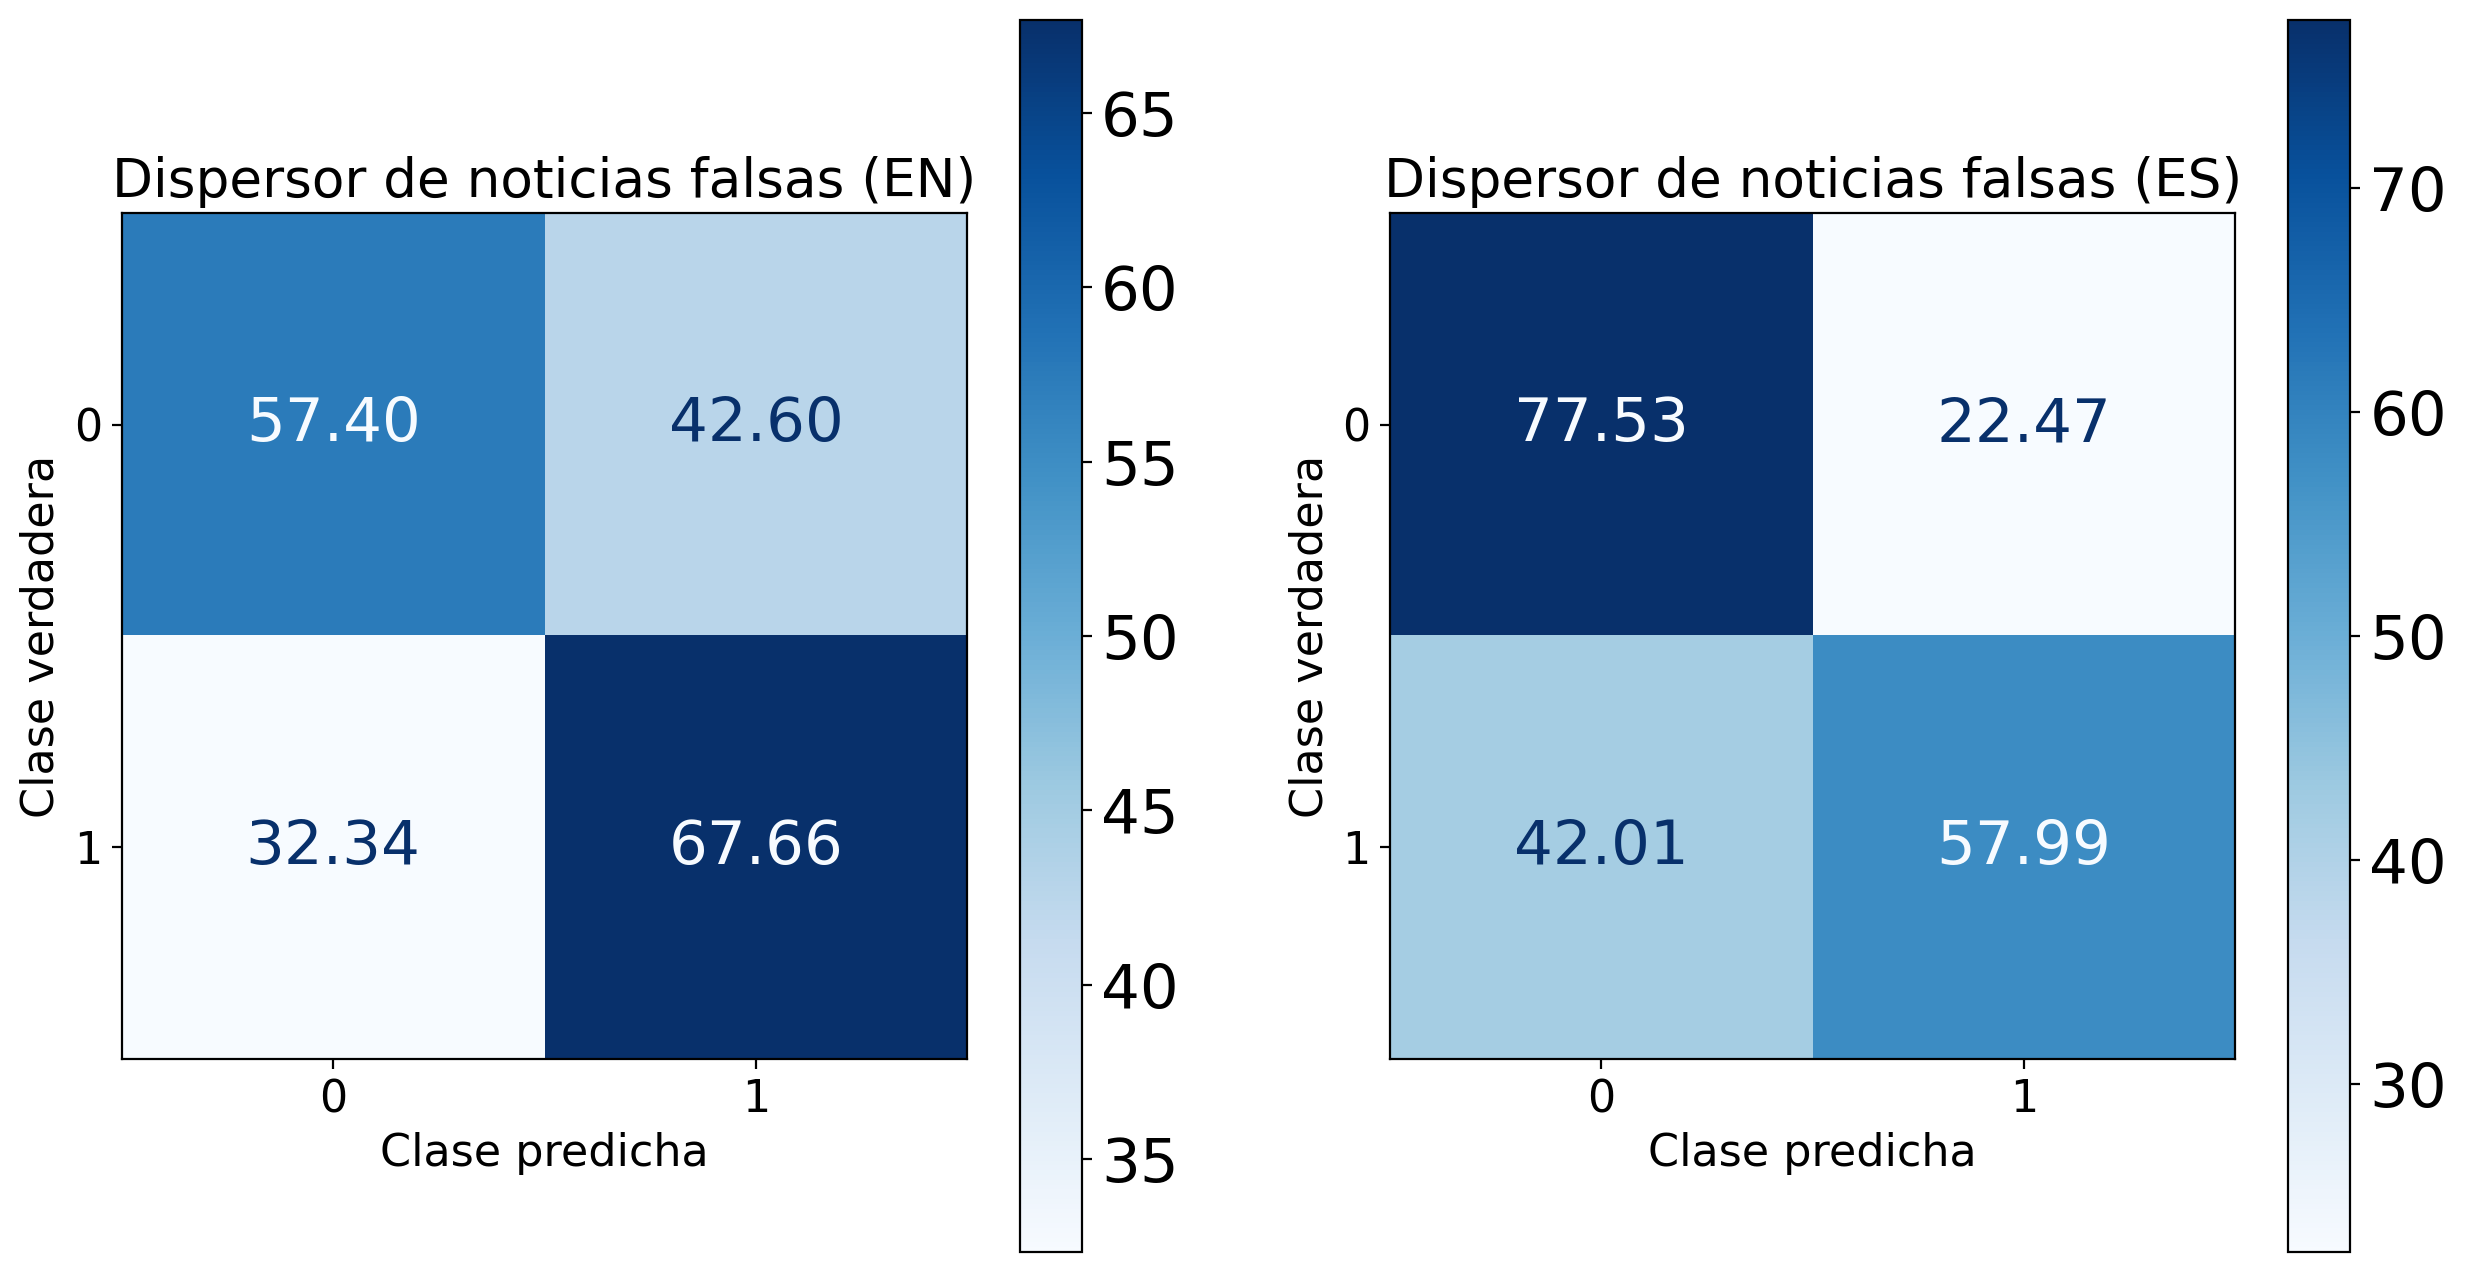

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Matrices de confusión
cm = [metrics_fake_en[1], metrics_fake_es[1]]

# Convertimos las matrices de conteo en matrices de porcentajes
cm1_perc = np.round(cm[0] / np.sum(cm[0]) * 200, 2)
cm2_perc = np.round(cm[1] / np.sum(cm[1]) * 200, 2)

# Creamos una figura con 4 subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

# Plot confusion matrices
plt.rcParams.update({'font.size': 22})
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1_perc, display_labels=target_names)
disp1.plot(include_values=True, values_format='.2f', cmap='Blues', ax=ax[0], xticks_rotation='horizontal')
plt.rcParams.update({'font.size': 16})
disp1.ax_.set_title('Dispersor de noticias falsas (EN)')
plt.rcParams.update({'font.size': 16})
disp1.ax_.set_xlabel('Clase predicha')
plt.rcParams.update({'font.size': 16})
disp1.ax_.set_ylabel('Clase verdadera')

plt.rcParams.update({'font.size': 22})
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2_perc, display_labels=target_names)
disp2.plot(include_values=True, values_format= '.2f', cmap='Blues', ax=ax[1], xticks_rotation='horizontal')
plt.rcParams.update({'font.size': 16})
disp2.ax_.set_title('Dispersor de noticias falsas (ES)')
plt.rcParams.update({'font.size': 16})
disp2.ax_.set_xlabel('Clase predicha')
plt.rcParams.update({'font.size': 16})
disp2.ax_.set_ylabel('Clase verdadera')

# Show figure
plt.show()